# Task 1 - Solubility Predictions

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import Draw
import scipy

# compare pca number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from matplotlib.offsetbox import AnchoredText

# sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

#from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score 
from sklearn.inspection import permutation_importance

#RDKit
from rdkit import Chem

In [332]:
# Load in the data and visualise
df = pd.read_csv('Husskonen_Solubility_Features.csv')
df

,0,Compound_Identifier,Source,SMILES,LogS.M.,MW,AMW,Sv,Se,Sp,...,Psychotic-80,Psychotic-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50\r\r\n
0,1,HU_100,Huuskonen,c1ccc2ccc3nccnc3c2c1,-2.68,180.22,8.192,15.623,21.854,16.296,...,0,0,0,0,1,0,1,0,1,0
1,2,HU_1000,Huuskonen,c1cnc2c(C)ncnc2n1,-0.12,146.17,8.598,11.612,17.291,11.784,...,0,0,0,0,0,0,0,0,0,0
2,3,HU_1001,Huuskonen,c1cnc2cnc(C)nc2n1,-0.47,146.17,8.598,11.612,17.291,11.784,...,0,0,0,0,0,0,0,0,0,0
3,4,HU_1002,Huuskonen,c1c(C)nc2cncnc2n1,0.06,146.17,8.598,11.612,17.291,11.784,...,0,0,0,0,0,0,0,0,0,0
4,5,HU_1003,Huuskonen,c1cnc2c(OC)ncnc2n1,-1.11,162.17,9.009,12.327,18.618,12.239,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,928,HU_T2_5,Huuskonen,c1ccccc1N2C(=O)C=C(C)N2C,-0.56,188.25,7.240,16.392,25.949,17.273,...,0,0,0,0,1,0,1,0,1,0
928,929,HU_T2_6,Huuskonen,n(c(nc(n1)NC(C)C)NCC)c1Cl,-3.85,215.72,7.704,16.569,28.251,17.693,...,0,0,1,0,1,0,1,0,1,0
929,930,HU_T2_7,Huuskonen,CCC1(C(=O)NC(=O)NC1=O)c2ccccc2,-2.34,232.26,8.009,18.821,29.604,19.182,...,0,0,1,0,1,1,1,0,1,0
930,931,HU_T2_8,Huuskonen,O=C(N(C)C)Nc(ccc(c1Cl)Cl)c1,-3.80,233.11,9.713,16.047,24.596,16.989,...,0,0,0,0,1,0,1,0,1,0


In [333]:
# Remove any columns that have strings or NaN
lst = []

# Loops through all the columns
for i in df:
    for value in df[i]:
        if type(value) == str:
            lst.append(str(i))

            
# Remove unwanted columns for now
remove = list(set(lst))
df = df.drop(columns=remove)

# Remove index artifact column
df = df.drop(columns=['0'])

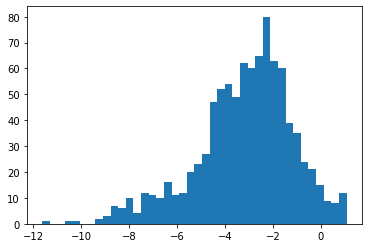

In [334]:
plt.hist(df['LogS.M.'], bins=40)
plt.show()

## Functions

In [335]:
print('Before: ', len(df.columns))
df.dropna(inplace=True)
print('After: ', len(df.columns))

Before:  2257
After:  2257


In [336]:
# split into X and y data
X = df.drop(['LogS.M.'], axis = 1)
y = df['LogS.M.']

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [338]:
# Define scaler object
sc = StandardScaler()

# Fit and transform the training data independantly of test set to prevent information leakage
s_train = sc.fit_transform(X_train)
s_train = pd.DataFrame(s_train, columns = X_train.columns, index = X_train.index)

# Perform same transformation to the test set
s_test = sc.transform(X_test)
s_test = pd.DataFrame(s_test, columns = X_test.columns, index = X_test.index)

X_train, X_test = s_train, s_test

# PCA

In [339]:
pca = PCA(n_components=40)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

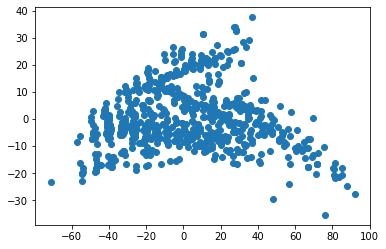

In [340]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.show()

# Ridge Regression

In [341]:
model = Ridge()

In [342]:
%%time
%%capture 
hyparam = {'alpha': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
ridge_grid = GridSearchCV(model, hyparam, cv=5, scoring='neg_mean_absolute_error')
ridge_grid.fit(X_train, y_train)

CPU times: user 376 ms, sys: 37.6 ms, total: 413 ms
Wall time: 153 ms


In [343]:
print(ridge_grid.best_params_)

{'alpha': 100}


In [344]:
# Use the tuned hyperparameters
ridge_model = Ridge(alpha=100)
fit_model = ridge_model.fit(X_train, y_train)
y_pred = fit_model.predict(X_test)

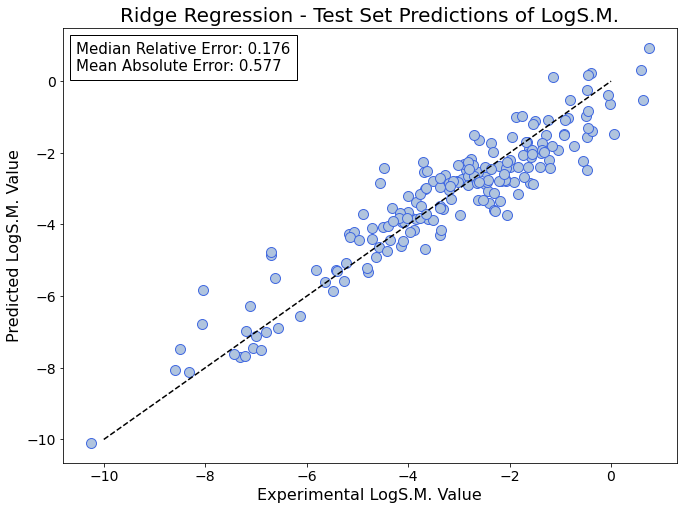

In [345]:
x_line = -10
y_line = 0
fig, ax = plt.subplots(1,1, figsize=(11,8))
ax.scatter(y_test, y_pred, color='lightsteelblue', edgecolor='royalblue', s=100)
ax.set_title('Ridge Regression - Test Set Predictions of LogS.M.', fontsize=20)
ax.set_xlabel('Experimental LogS.M. Value', fontsize=16)
ax.set_ylabel('Predicted LogS.M. Value', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)

# Calculate Errors
rel_error = abs((y_test - y_pred.ravel())/y_test)
MedRE = round(np.median(rel_error), 3)

mae = round(mean_absolute_error(y_pred, y_test),3)

# Plot Errors
text = 'Median Relative Error: '+ str(MedRE)+'\nMean Absolute Error: '+str(mae)
at = AnchoredText(text, loc='upper left', prop=dict(size=15), frameon=True)
ax.add_artist(at)

ax.plot([x_line, y_line], [x_line, y_line], linestyle='--', color='black')
plt.show()

In [346]:
mae = round(mean_absolute_error(y_pred, y_test),3)
print('Mean Absolute Error: ', mae)

rel_error = abs((y_test - y_pred.ravel())/y_test)
MedRE = round(np.median(rel_error), 3)
print('Median Relative Error: ', MedRE)

Mean Absolute Error:  0.577
Median Relative Error:  0.176


# SVR 

In [347]:
model = SVR(kernel='rbf')

In [348]:
%%time
%%capture
hyparam = {'gamma':['scale', 'auto'], 'epsilon':[0.001, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1], 'C':[0.1, 0.25, 0.5, 1, 2, 5, 10, 20, 30, 50]}
svr_grid = GridSearchCV(model, hyparam, cv=5, scoring='neg_mean_absolute_error')
svr_grid.fit(X_train, y_train)

CPU times: user 41.2 s, sys: 197 ms, total: 41.4 s
Wall time: 41.8 s


In [349]:
print(svr_grid.best_params_)

{'C': 20, 'epsilon': 0.25, 'gamma': 'scale'}


In [350]:
# Use the tuned hyperparameters
svr_model = SVR(kernel='rbf', C=20, gamma='scale', epsilon=0.25)
fit_model = svr_model.fit(X_train, y_train)
y_pred = fit_model.predict(X_test)

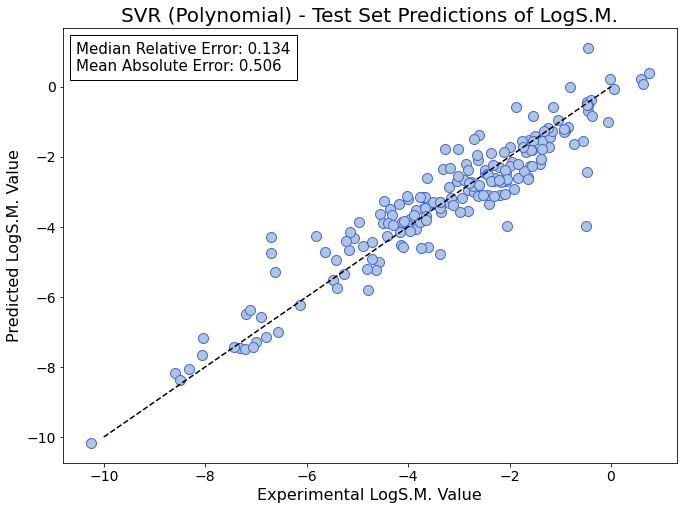

In [351]:
x_line = -10
y_line = 0
fig, ax = plt.subplots(1,1, figsize=(11,8))
ax.scatter(y_test, y_pred, color='lightsteelblue', edgecolor='royalblue', s=100)
ax.set_title('SVR (Polynomial) - Test Set Predictions of LogS.M.', fontsize=20)
ax.set_xlabel('Experimental LogS.M. Value', fontsize=16)
ax.set_ylabel('Predicted LogS.M. Value', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)

# Calculate Errors
rel_error = abs((y_test - y_pred.ravel())/y_test)
MedRE = round(np.median(rel_error), 3)

mae = round(mean_absolute_error(y_pred, y_test),3)

# Plot Errors
text = 'Median Relative Error: '+ str(MedRE)+'\nMean Absolute Error: '+str(mae)
at = AnchoredText(text, loc='upper left', prop=dict(size=15), frameon=True)
ax.add_artist(at)

ax.plot([x_line, y_line], [x_line, y_line], linestyle='--', color='black')
plt.show()

In [352]:
mae = round(mean_absolute_error(y_pred, y_test),3)
print('Mean Absolute Error: ', mae)

rel_error = abs((y_test - y_pred.ravel())/y_test)
MedRE = round(np.median(rel_error), 3)
print('Median Relative Error: ', MedRE)

Mean Absolute Error:  0.506
Median Relative Error:  0.134


### Structural Analysis

With this, we take the structures from the test set and calculate the individual errors and attain the original index so we can visualise them using RDKit

In [353]:
df = pd.read_csv('Husskonen_Solubility_Features.csv')

In [354]:
predictions = pd.DataFrame(y_pred, columns=['pred_LogS.M.'])
logS = pd.DataFrame(y_test)
logS.reset_index(inplace=True)
predictions = pd.concat([logS, predictions], axis=1)
predictions.rename(columns={'index':'original_index'}, inplace=True)
predictions

,original_index,LogS.M.,pred_LogS.M.
0,267,-0.50,-3.983105
1,722,-1.66,-1.607237
2,813,-3.61,-4.574308
3,347,-7.32,-7.466642
4,825,-8.04,-7.165105
...,...,...,...
182,607,-1.64,-2.640197
183,429,-1.84,-2.216071
184,463,0.74,0.399086
185,554,-5.40,-5.739537


In [355]:
diff = np.abs(predictions['LogS.M.'] - predictions['pred_LogS.M.'])
predictions['error'] = diff
predictions

,original_index,LogS.M.,pred_LogS.M.,error
0,267,-0.50,-3.983105,3.483105
1,722,-1.66,-1.607237,0.052763
2,813,-3.61,-4.574308,0.964308
3,347,-7.32,-7.466642,0.146642
4,825,-8.04,-7.165105,0.874895
...,...,...,...,...
182,607,-1.64,-2.640197,1.000197
183,429,-1.84,-2.216071,0.376071
184,463,0.74,0.399086,0.340914
185,554,-5.40,-5.739537,0.339537


In [356]:
large_errors = predictions['original_index'].loc[predictions['error'] > 1]
lst = large_errors.to_list()

In [357]:
smiles_lst = []
for i in lst:
    smiles_lst.append(df["SMILES"].iloc[i])
smiles_lst

['NCCC(O)C(=O)NC2CC(N)C(OC1OC(CN)C(O)C(O)C1O)C(O)C2OC3OC(CO)C(O)C(N)C3O',
 'n1cncn1CC(O)(c2ccc(F)cc2)c3ccccc3F',
 'O=C(NC(CCCC1)C1)NS(=O)(=O)c(ccc(c2)C(=O)C)c2',
 'O=N(=O)c(c(c(c(c1Cl)Cl)Cl)Cl)c1Cl',
 'O=C(CCCC1C)C1',
 'O=P(Oc1ccc(O)cc1C)(Oc2cc(O)ccc2C)Oc3c(O)cccc3C',
 'CC(=O)OC3(CCC4C2CCC1=CC(=O)CCC1C2CCC34C)C#C',
 'O=C1C2(C(C3CCC4C(C3CC2)(C)CCCC4)CC1)C',
 'c(c(c(N)cc1)ccc2)(c2)c1',
 'O=C(NC1C2C3CCCC3C(C1)C2)N(C)C',
 'C1=CC2C(N(C)C5)Cc3ccc(O)c4c3C2(C5)C(O4)C1O',
 'Oc1cc(O)c2C(=O)CC(c3cc(O)c(O)cc3)Oc2c1',
 'CC1(C)CC(C)CC1',
 'O=C(N(C(C1=O)(C)C)Cl)N1Cl',
 'n(cccc1O)c1',
 'c1c(S)nc2cncnc2n1',
 'n(H)(c(c(c1cccc2)ccc3)c3)c12',
 'CN1C2CC(CC1C3OC23)OC(=O)C(CO)c4ccccc4',
 'COP(=S)(OC)Oc1cc(Cl)c(I)cc1Cl',
 'CCCCC1(CC)C(=O)NC(=O)NC1=O']

NCCC(O)C(=O)NC2CC(N)C(OC1OC(CN)C(O)C(O)C1O)C(O)C2OC3OC(CO)C(O)C(N)C3O


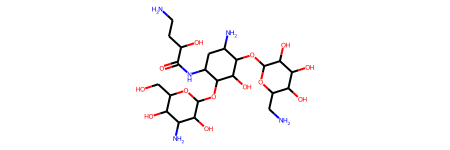

n1cncn1CC(O)(c2ccc(F)cc2)c3ccccc3F


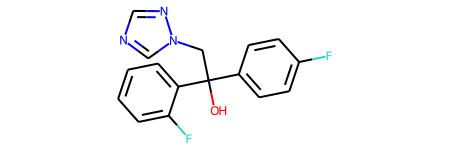

O=C(NC(CCCC1)C1)NS(=O)(=O)c(ccc(c2)C(=O)C)c2


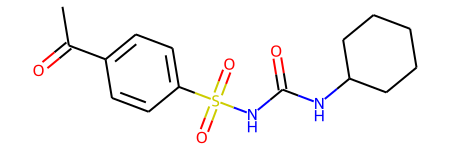

O=N(=O)c(c(c(c(c1Cl)Cl)Cl)Cl)c1Cl


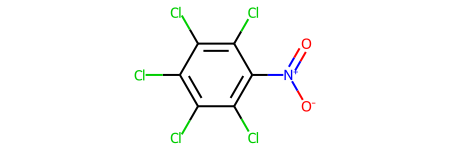

O=C(CCCC1C)C1


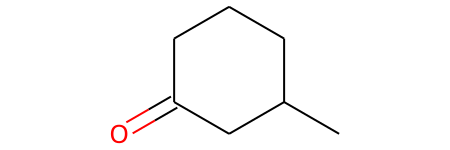

O=P(Oc1ccc(O)cc1C)(Oc2cc(O)ccc2C)Oc3c(O)cccc3C


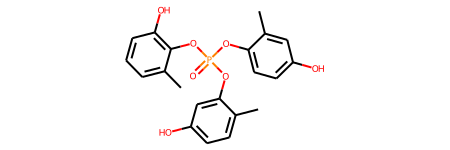

CC(=O)OC3(CCC4C2CCC1=CC(=O)CCC1C2CCC34C)C#C


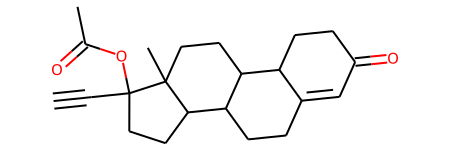

O=C1C2(C(C3CCC4C(C3CC2)(C)CCCC4)CC1)C


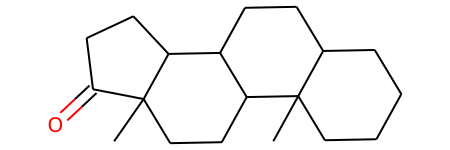

c(c(c(N)cc1)ccc2)(c2)c1


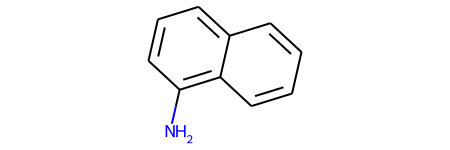

O=C(NC1C2C3CCCC3C(C1)C2)N(C)C


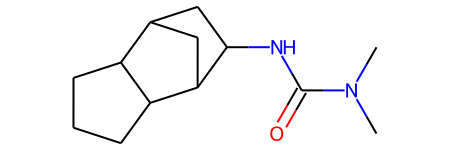

C1=CC2C(N(C)C5)Cc3ccc(O)c4c3C2(C5)C(O4)C1O


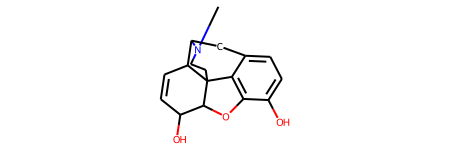

Oc1cc(O)c2C(=O)CC(c3cc(O)c(O)cc3)Oc2c1


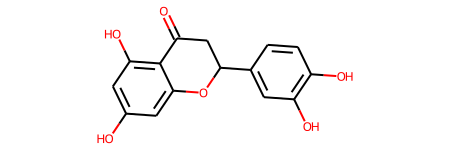

CC1(C)CC(C)CC1


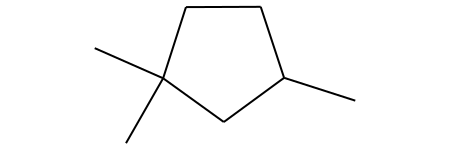

O=C(N(C(C1=O)(C)C)Cl)N1Cl


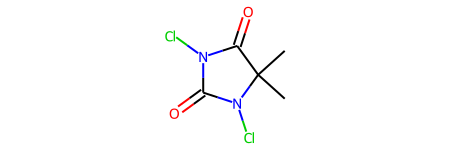

n(cccc1O)c1


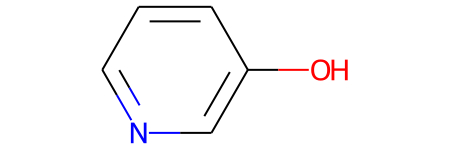

c1c(S)nc2cncnc2n1


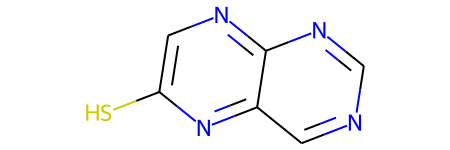

n(H)(c(c(c1cccc2)ccc3)c3)c12


[00:22:10] SMILES Parse Error: syntax error while parsing: n(H)(c(c(c1cccc2)ccc3)c3)c12
[00:22:10] SMILES Parse Error: Failed parsing SMILES 'n(H)(c(c(c1cccc2)ccc3)c3)c12' for input: 'n(H)(c(c(c1cccc2)ccc3)c3)c12'


None

CN1C2CC(CC1C3OC23)OC(=O)C(CO)c4ccccc4


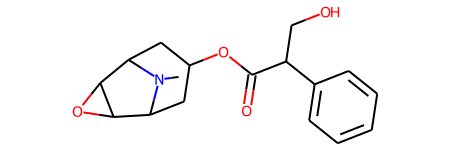

COP(=S)(OC)Oc1cc(Cl)c(I)cc1Cl


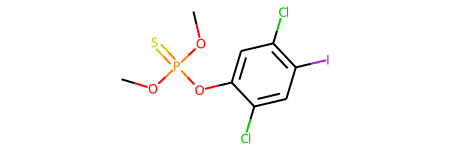

CCCCC1(CC)C(=O)NC(=O)NC1=O


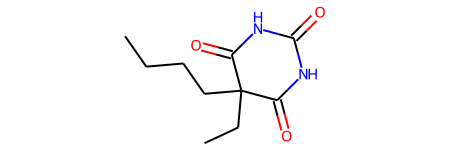

In [358]:
for i in smiles_lst:
    print(i)
    m = Chem.MolFromSmiles(i)
    display(m)